In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy
from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [ ]:
!pip install scrapy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
reviews=pd.read_csv("/content/extract_reviews.csv")

In [ ]:
reviews.tail()

,stars,comment
1155,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Sapiens don't need...
1156,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n This book is writt...
1157,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n The book was deliv...
1158,5.0 out of 5 stars,"\n\n\n\n\n\n\n\n \n \n A fine book, writt..."
1159,5.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Excellent book. I ...


In [ ]:
reviews=[comment.strip() for comment in reviews.comment] # remove both the leading and the trailing characters
reviews=[comment for comment in reviews if comment] # removes empty strings, because they are considered in Python as False
reviews[0:10]

['I have read Homo Deus and Sapiens in a row, Firstly both the books are written in a lucid flow nothing is left out for doubt but every sentence provoke you to think of our past present and future.Its unbelievable  how author put forth history/future of humankind in such an never ending enthusiastic manner.loved both the books',
 'I have special interest in History as i love it as subject. I have read many history books not only modern but also ancient or books on prehistory. But after reading Homosapiens i am just overwhelmed that how the author has presented evolution of human history in such a simplistic , unique and analytical manner.  This book not only details anthropological evidences or facts but it covers all scenarios to present the picture whether  it is biology, genetics, culture, science , environment etc.I loved the way the author covered the issue and aspects of religion in human history from early man till today. How and why religion evolved , and how religion is direc

In [ ]:
#combining the entire list into on string
reviews_text=' '.join(reviews)

In [ ]:
# Remove Punctuations 
no_punctuation=reviews_text.translate(str.maketrans('','',string.punctuation))

In [ ]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk import word_tokenize
text_tokens=word_tokenize(no_punctuation)
print(text_tokens[0:50])

['I', 'have', 'read', 'Homo', 'Deus', 'and', 'Sapiens', 'in', 'a', 'row', 'Firstly', 'both', 'the', 'books', 'are', 'written', 'in', 'a', 'lucid', 'flow', 'nothing', 'is', 'left', 'out', 'for', 'doubt', 'but', 'every', 'sentence', 'provoke', 'you', 'to', 'think', 'of', 'our', 'past', 'present', 'and', 'futureIts', 'unbelievable', 'how', 'author', 'put', 'forth', 'historyfuture', 'of', 'humankind', 'in', 'such', 'an']


In [ ]:
len(text_tokens)

123540

In [ ]:
# Removing stopwords
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list=['I','The','It','A']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]

In [ ]:
# Normalizing the data to lower case
lower_words=[comment.lower() for comment in no_stop_tokens]

In [ ]:
# Stemming
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]

In [ ]:
#lemmatization
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
lemmas=[token.lemma_ for token in doc]

In [ ]:
clean_reviews=' '.join(lemmas)

# Feature Extraction

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
reviewscv=cv.fit_transform(lemmas)

In [ ]:
print(reviewscv.toarray().shape)

(67396, 364)


# Count Vectroizer with N-grams

In [ ]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

# TF-IDF Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matrix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

# Genearate Word Cloud

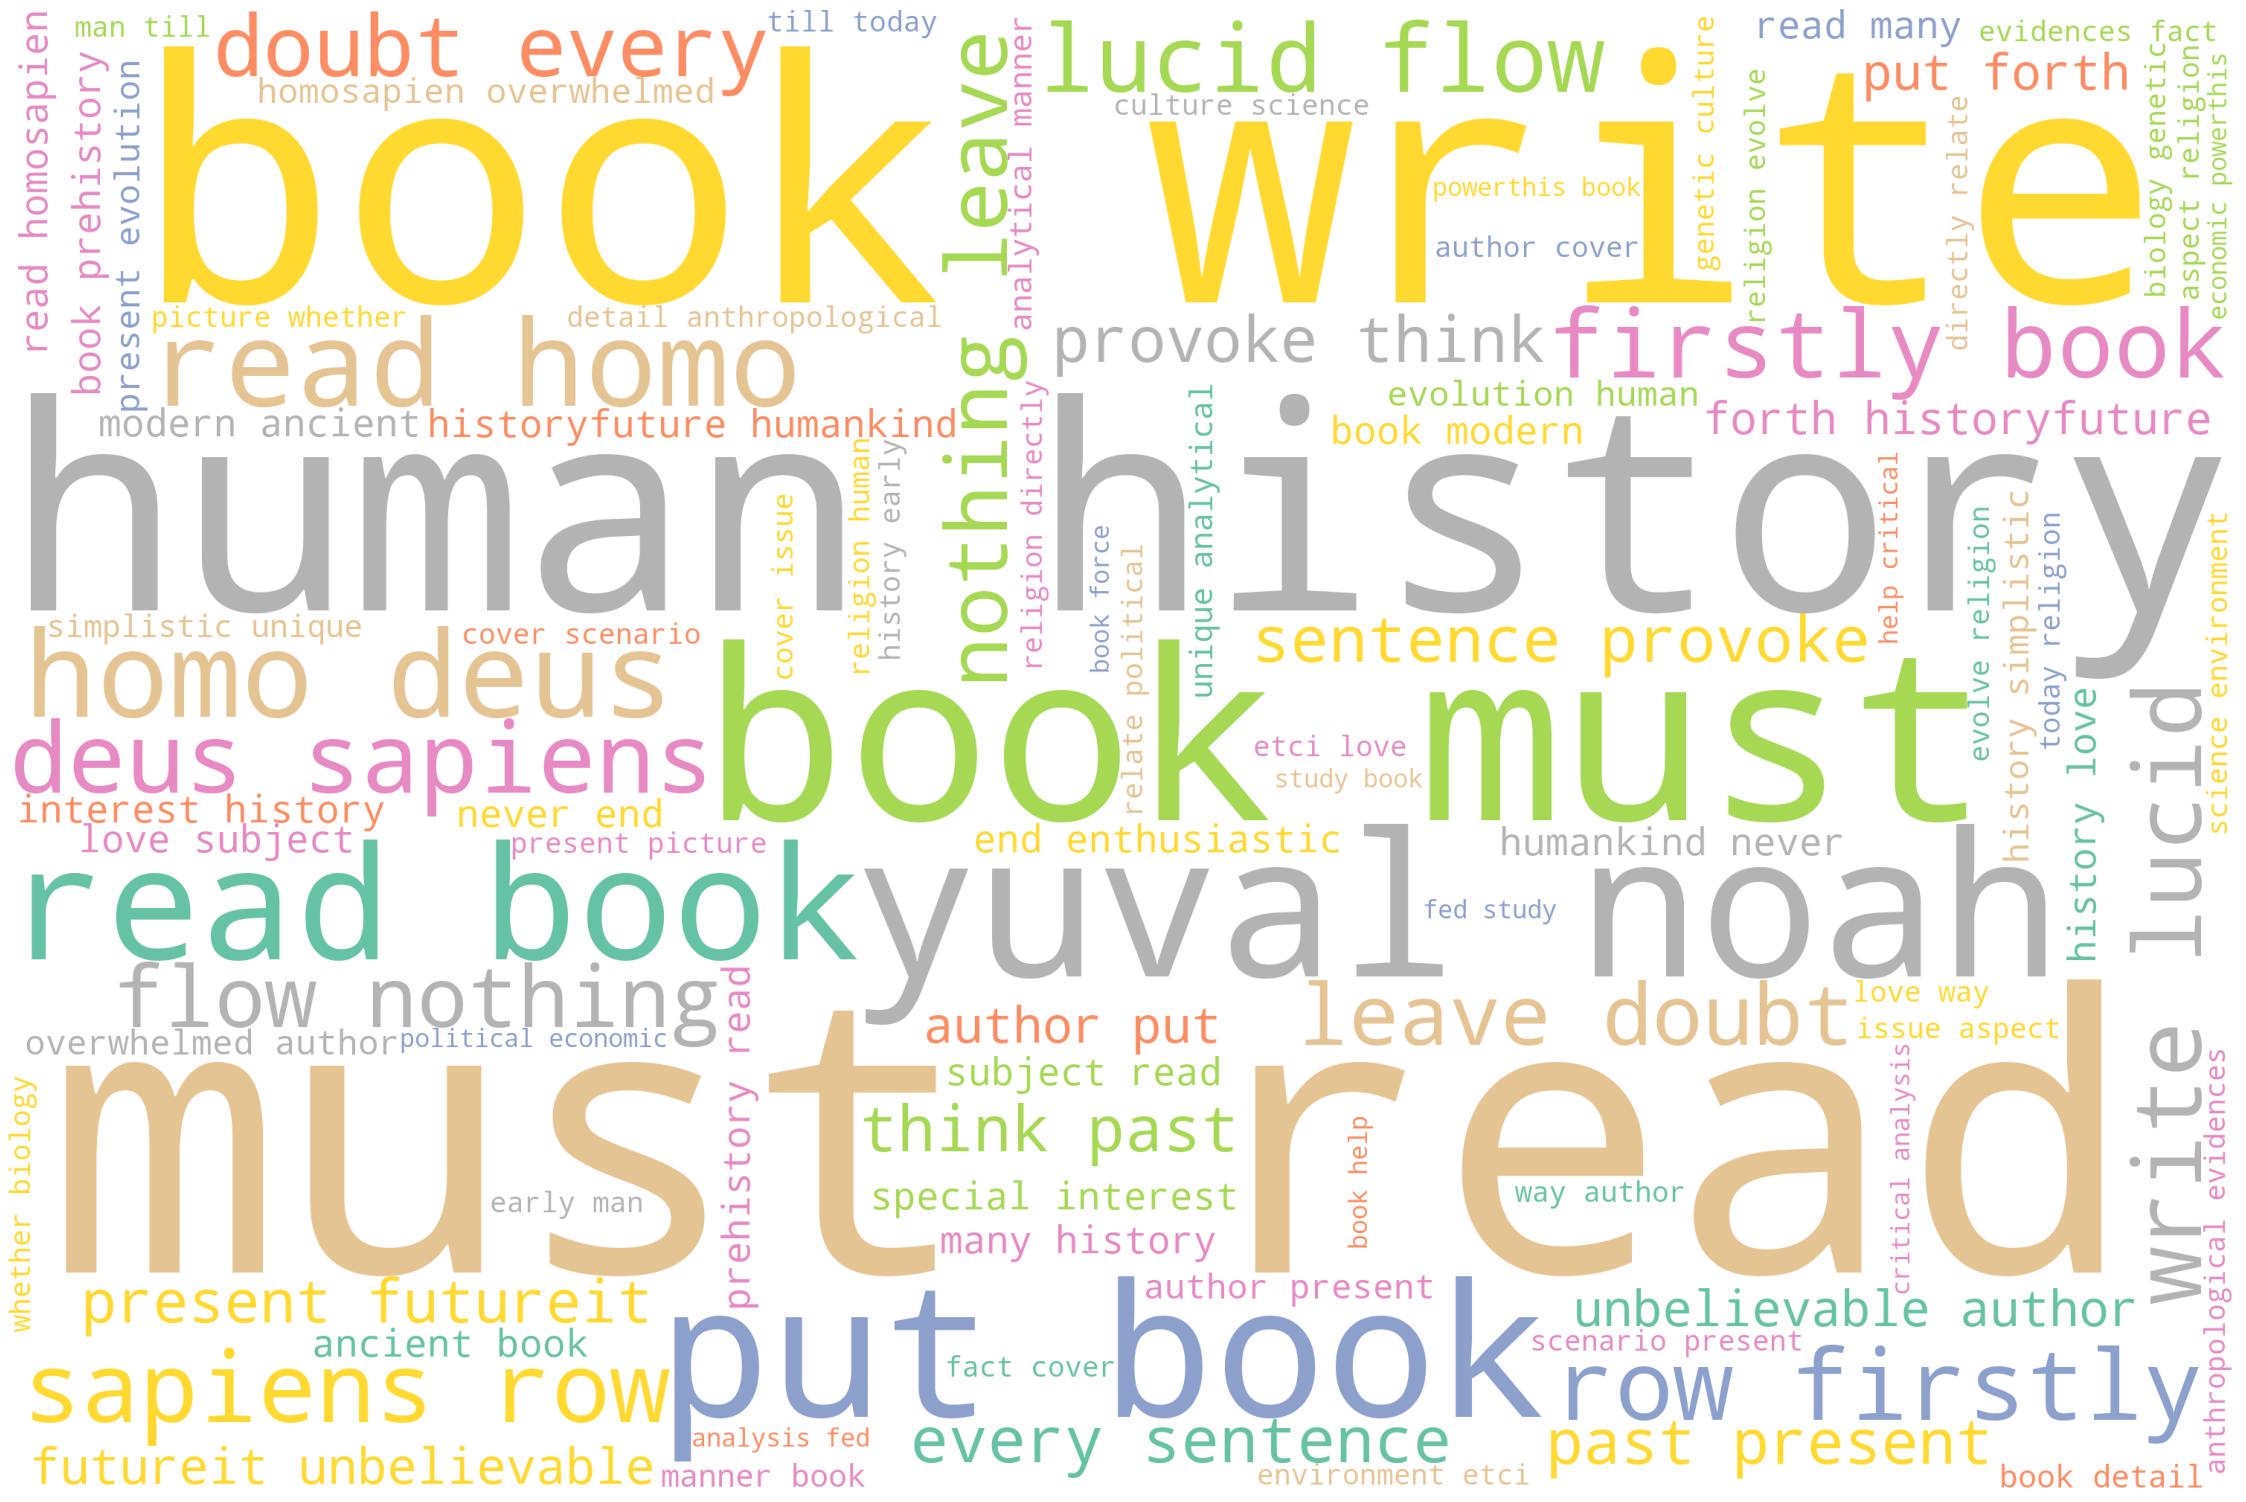

In [ ]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

# Generate word cloud

STOPWORDS.add('Pron')
wordcloud=WordCloud(width=3000,height=2000,background_color='white',max_words=100,
                   colormap='Set2',stopwords=STOPWORDS).generate(clean_reviews)
plot_cloud(wordcloud)

# Named Entity Recognition

In [ ]:
# Parts of speech (POS) tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_reviews
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [ ]:
for token in doc_block[100:200]:
    print(token,token.pos_)

analysis NOUN
fed PROPN
study NOUN
this DET
book NOUN
force NOUN
form VERB
opinion NOUN
base NOUN
fact NOUN
logic NOUN
rather ADV
religion NOUN
superstition NOUN
some DET
good ADJ
chapter NOUN
book NOUN
are1 PROPN
history PROPN
big ADJ
fraud2 NOUN
there ADV
justice NOUN
history3 NOUN
law PROPN
religion4 ADJ
marriage NOUN
science NOUN
empires5 NOUN
end VERB
homosapiensthis DET
book NOUN
must AUX
read VERB
student NOUN
history NOUN
curious ADJ
enough ADJ
understand VERB
concept NOUN
human ADJ
history NOUN
evolvedbook VERB
specification NOUN
1 NUM
book NOUN
sapiens2 NOUN
author NOUN
yuval PROPN
noah PROPN
harari3 PROPN
language NOUN
english4 NOUN
year PROPN
20155 NUM
publisher NOUN
penguin6 NOUN
partschapter PROPN
520 NUM
sapien PROPN
yuval PROPN
noah PROPN
harari PROPN
one NUM
important ADJ
book NOUN
21st ADJ
century NOUN
eye NOUN
opener NOUN
informative NOUN
get VERB
harari PROPN
literally ADV
compile VERB
information NOUN
planet NOUN
specie NOUN
put VERB
book PROPN
tell VERB
we PRON
re

In [ ]:
#  nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['get', 'compile', 'information', 'planet', 'specie', 'put', 'tell', 'reason', 'world', 'live', 'today', 'way', 'book', 'describe', 'casual', 'readi', 'reader', 'finish', 'book', 'hour', 'day', 'book', 'take', 'week', 'finish', 'think', 'thing', 'contain', 'information', 'tell', 'need', 'time', 'process', 'reading', 'stop', 'topic', 'think', 'process', 'pick', 'book', 'book', 'book', 'come', 'level', 'importance', 'mustread', 'read', 'book', 'understand', 'way', 'evolve', 'way', 'planet', 'consequence', 'decision', 'human', 'planet', 'book', 'make', 'think', 'think', 'think', 'read', 'find', 'book', 'history', 'spectrum', 'insight', 'condense', 'volume', 'recommend', 'read', 'homo', 'row', 'book', 'write', 'flow', 'leave', 'doubt', 'sentence', 'provoke', 'think', 'author', 'put', 'historyfuture', 'humankind', 'end', 'mannerloved', 'book', 'read', 'row', 'book', 'write', 'flow', 'leave', 'doubt', 'sentence', 'provoke', 'think', 'author']


In [ ]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x: x[1],reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] 

,word,count
0,book,3702
1,read,1392
2,history,1160
3,think,1044
4,author,812
5,way,580
6,write,464
7,evolution,464
8,religion,464
9,put,348


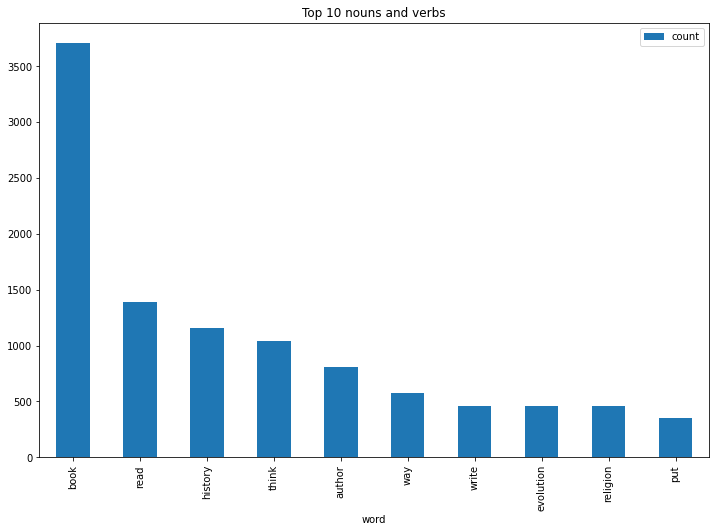

In [ ]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs')

# Sentimental Analysis

In [ ]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(reviews))

In [ ]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])

In [ ]:
affin=pd.read_csv("/content/Afinn.csv",encoding='Latin-1')

In [ ]:
affin.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [ ]:
affinity_scores=affin.set_index('word')['value'].to_dict()

In [ ]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [ ]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0        1
1        0
2        0
3        3
4        2
        ..
5911     0
5912     4
5913    10
5914     1
5915     0
Name: sentiment_value, Length: 5916, dtype: int64

In [ ]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,index
0,"I have read Homo Deus and Sapiens in a row, Fi...",1,0
1,I have read many history books not only modern...,0,1
2,But after reading Homosapiens i am just overwh...,0,2
3,This book not only details anthropological evi...,3,3
4,"How and why religion evolved , and how religio...",2,4
...,...,...,...
5911,It's a gem.,0,5911
5912,"I was overly hasty in my earlier review, but o...",4,5912
5913,I wish we had this kind of interesting approac...,10,5913
5914,People with not much awareness of scientific c...,1,5914


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


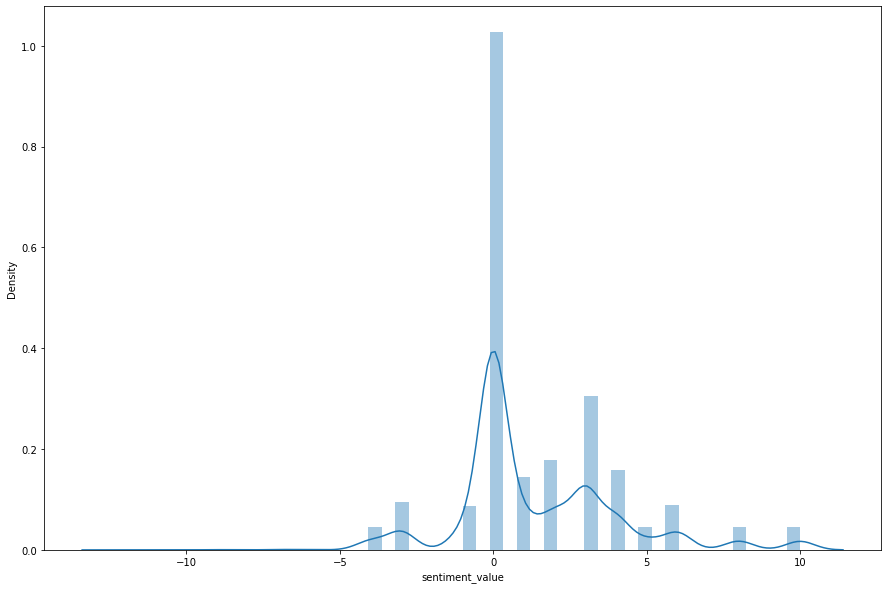

In [ ]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

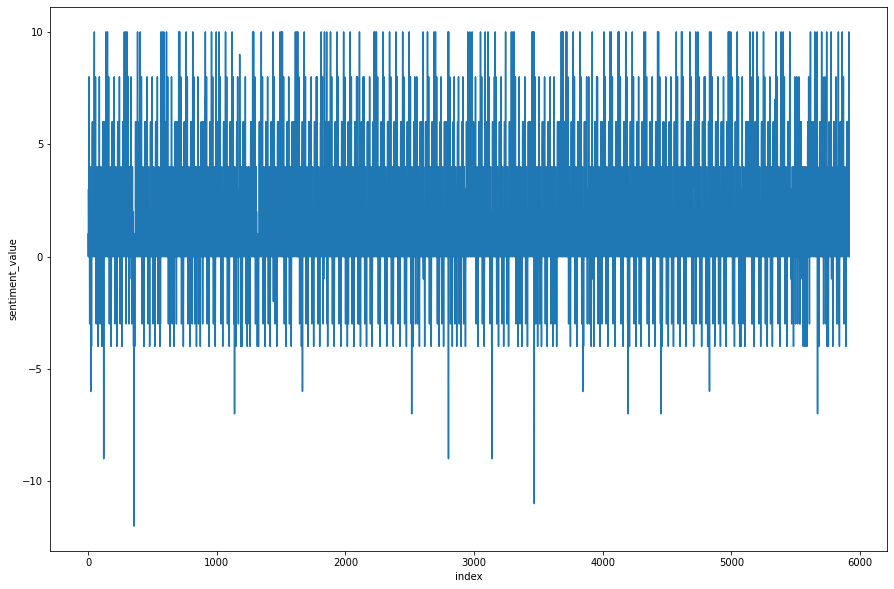

In [ ]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

In [ ]:
# word count
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0       69
1       16
2       27
3       48
4       33
        ..
5911     3
5912    24
5913    28
5914    29
5915     4
Name: word_count, Length: 5916, dtype: int64

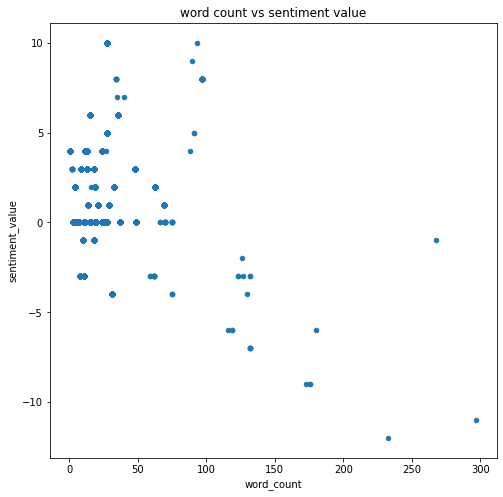

In [ ]:
sent_df.plot.scatter(x='word_count',y='sentiment_value',title='word count vs sentiment value',figsize=(8,8))